# Univariate

In [7]:
import numpy as np
import pandas as pd
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

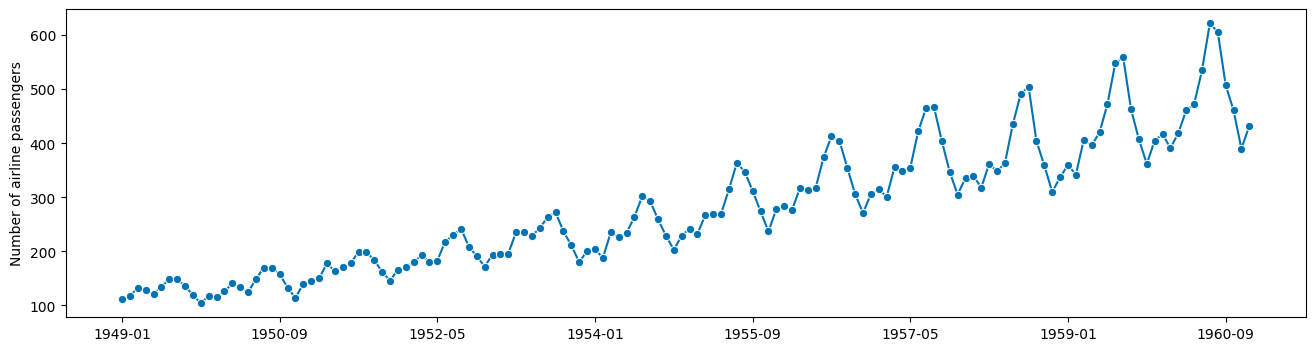

In [2]:
y = load_airline()

# plotting for visualization
plot_series(y)

In [4]:
import numpy as np
fh = np.arange(1, 37)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [10]:
from sktime.forecasting.naive import NaiveForecaster

In [11]:
forecaster = NaiveForecaster(strategy="last")

In [12]:
forecaster.fit(y)

NaiveForecaster()

In [13]:
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

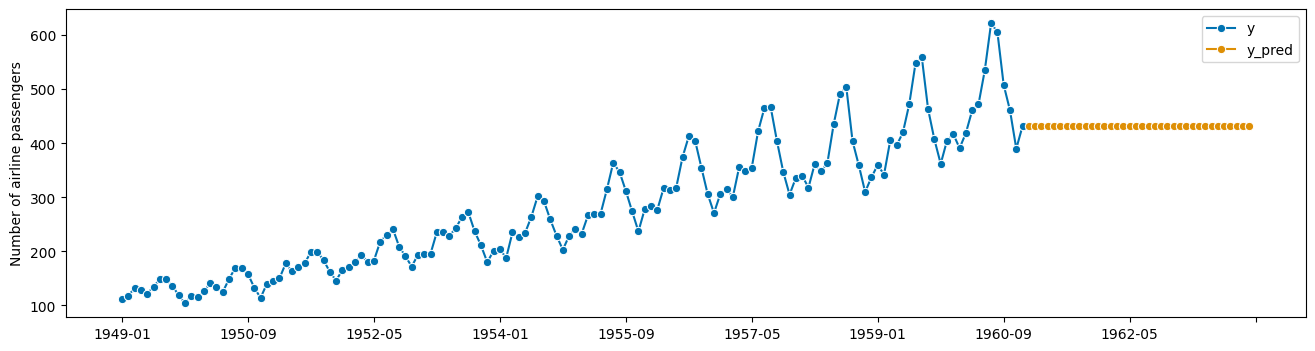

In [14]:
plot_series(y, y_pred, labels=["y", "y_pred"])

In [15]:
forecaster = NaiveForecaster(strategy="last", sp=12)

In [16]:
forecaster.fit(y)

NaiveForecaster(sp=12)

In [17]:
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

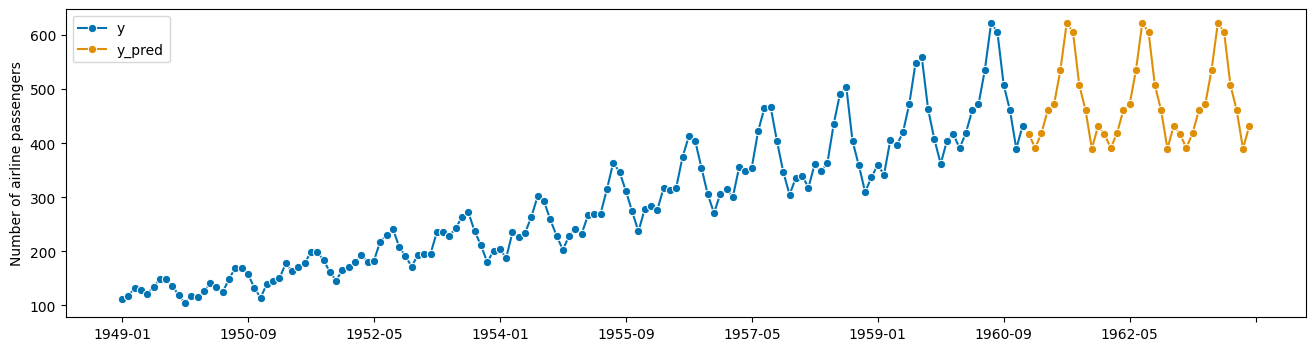

In [18]:
plot_series(y, y_pred, labels=["y", "y_pred"])

In [19]:
from sktime.registry import all_estimators

for forecaster in all_estimators(filter_tags={"scitype:y": ["multivariate", "both"]}):
    print(forecaster[0])

C:\Users\owner\anaconda3\envs\evometric\lib\site-packages\sktime\utils\validation\_dependencies.py:117: UserWarning: str requires package 'dtw-python' to be present in the python environment, but 'dtw-python' was not found. 'dtw-python' is a soft dependency and not included in the base sktime installation. Please run: `pip install dtw-python` to install the dtw-python package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)
C:\Users\owner\anaconda3\envs\evometric\lib\site-packages\sktime\utils\validation\_dependencies.py:167: UserWarning: tensorflow and tensorflow-probability are required for deep learning and probabilistic functionality in `sktime`. To install these dependencies, run: `pip install sktime[dl]`
  warnings.warn(msg)
C:\Users\owner\anaconda3\envs\evometric\lib\site-packages\sktime\utils\validation\_dependencies.py:117: UserWarning: No module named 'tsfresh'. 'tsfresh' is a soft dependency and not included in the base sktime ins

In [28]:
from sktime.datasets import load_longley
from sktime.forecasting.var import VAR

_, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

In [29]:
forecaster = VAR()
forecaster.fit(y, fh=[1, 2, 3])
y_pred = forecaster.predict()

In [30]:
y_pred

,GNPDEFL,GNP
1963,121.688295,578514.398653
1964,124.353664,601873.015890
1965,126.847886,625411.588754


In [31]:
y

,GNPDEFL,GNP
Period,,
1947,83.0,234289.0
1948,88.5,259426.0
1949,88.2,258054.0
1950,89.5,284599.0
1951,96.2,328975.0
1952,98.1,346999.0
1953,99.0,365385.0
1954,100.0,363112.0
1955,101.2,397469.0


In [33]:
from sktime.forecasting.arima import ARIMA
forecaster = ARIMA()

In [34]:
forecaster.fit(y, fh=[1, 2, 3])

C:\Users\owner\anaconda3\envs\evometric\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA()

In [35]:
y_pred = forecaster.predict()

In [36]:
y_pred

,GNPDEFL,GNP
Period,,
1963,116.618807,548785.487694
1964,116.342338,542932.337375
1965,116.070512,537323.873818


In [37]:
forecaster.forecasters_

,GNPDEFL,GNP
forecasters,ARIMA(),ARIMA()
